# Unidad 6 - Ajustes y modelos 1

**Ejercicio N° 1**

En un análisis de calidad de un producto alimenticio de un determinado laboratorio se desea conocer la relación entre el tiempo de exposición, de una misma cantidad de producto, a una temperatura de 180° y el número de bacterias sobrevivientes. Para ello se realizó un experimento en 12 observaciones de diferentes tiempos de exposición donde se observó la cantidad de bacterias sobrevivientes.


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [133]:
df = pd.read_csv("datasets/bacterias.csv", sep=';')
df

,ID,bacterias_vivas,segundos
0,85,16,11
1,125,50,6
2,106,71,5
3,118,11,12
4,72,95,3
5,19,175,1
6,65,31,8
7,69,82,4
8,74,108,2
9,101,49,7


Proponga  un *análisis exploratorio de los datos* y comente la **relación que se puede observar entre las variables**.

In [134]:
df.shape

(12, 3)

In [135]:
df.columns = ['ID','bacterias_vivas','segundos']

<Axes: xlabel='segundos', ylabel='bacterias_vivas'>

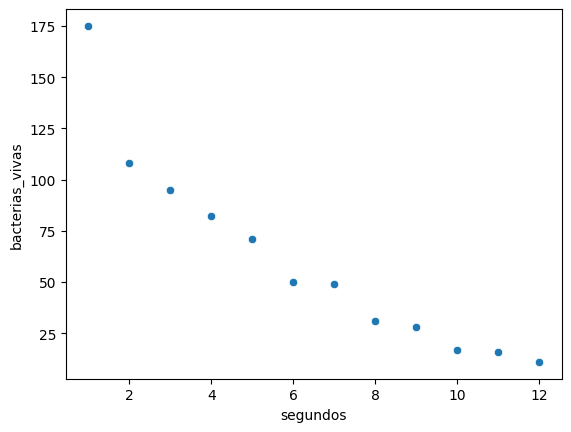

In [136]:
sns.scatterplot(df, x=df['segundos'], y=df['bacterias_vivas'])

In [137]:
df['bacterias_log'] = np.log(df['bacterias_vivas'])

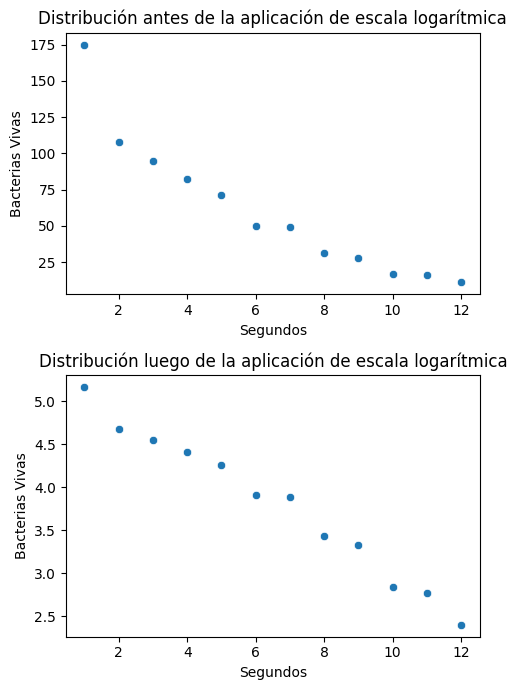

In [138]:
fig, axes = plt.subplots(2,1, figsize=(5,7))
sns.scatterplot(df, x=df['segundos'], y=df['bacterias_vivas'], ax=axes[0])
sns.scatterplot(df, x=df['segundos'], y=df['bacterias_log'], ax=axes[1])
axes[0].set_title("Distribución antes de la aplicación de escala logarítmica")
axes[1].set_title("Distribución luego de la aplicación de escala logarítmica")
axes[0].set_ylabel("Bacterias Vivas")
axes[1].set_ylabel("Bacterias Vivas")
axes[0].set_xlabel("Segundos")
axes[1].set_xlabel("Segundos")
plt.tight_layout()
plt.show()

In [139]:
df.columns

Index(['ID', 'bacterias_vivas', 'segundos', 'bacterias_log'], dtype='object')

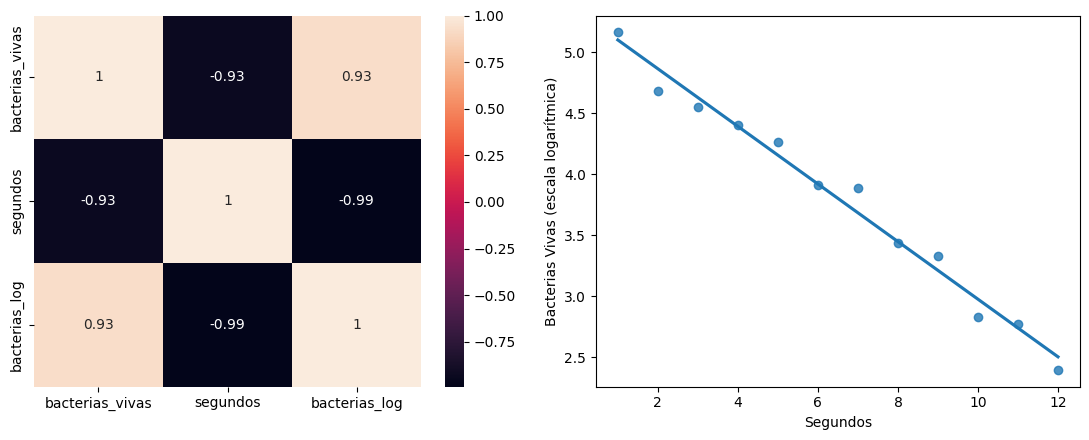

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(11,4.5))
variables_correlacionar = ['bacterias_vivas', 'segundos', 'bacterias_log']
sns.heatmap(df[variables_correlacionar].corr(), annot=True, ax=axes[0])
sns.regplot(data=df, x='segundos', y='bacterias_log', ci=False, ax=axes[1])
axes[1].set_ylabel("Bacterias Vivas (escala logarítmica)")
axes[1].set_xlabel("Segundos")
plt.tight_layout()
plt.show()

 ¿Es posible ajustar un modelo de regresión simple entre estas variables?

De ser así indique cual sería el modelo propuesto en relación al problema que busca modelizar y ajustelo con las librerías propuestas en clase. Proponga un analisis de residuos.  Y explique las salidas del modelo (coeficientes, R2, y lo que le parezca pertinente).

Escriba sus conclusiones al respecto

*Considero que sí es posible ajustar un modelo de regresión simple porque las variables presentan una correlación lineal, podemos ver con el correlograma y con la gráfica que la correlación existe.*

In [141]:
import statsmodels.formula.api as smf

modelo1 = smf.ols(formula = 'bacterias_log ~ segundos', 
                  data=df).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:          bacterias_log   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     550.3
Date:              jue., 03 jul. 2025   Prob (F-statistic):           4.49e-10
Time:                        18:28:40   Log-Likelihood:                 9.4710
No. Observations:                  12   AIC:                            -14.94
Df Residuals:                      10   BIC:                            -13.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3388      0.074     72.054      0.0

c:\Users\Gabriel\Documents\proyectos\Entornos\Fundamentos Ciencias de Datos\notebooks\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Resultado del modelo:
$ bacterias\_log = 5.3388 -0.2362 * segundos $

Cuando el tiempo es cero, hay 5.3388 bacterias vivas.
Por cada segundo que pasa, el logaritmo de bacterias vivas disminuye 0.236 unidades.

R² = 0.982
Muy alto. El 98.2% de la variabilidad en bacterias_log se explica por segundos.

p-valores ≈ 0
Los dos coeficientes son  significativos (p < 0.001).

En este rango de datosl modelo tiene alta capacidad predictiva.

## GRAFICO RESIDUOS



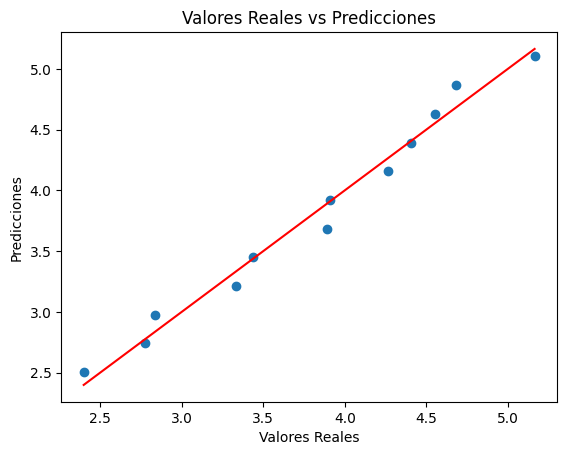

In [142]:
valores_predichos = modelo1.fittedvalues
valores_muestra = df['bacterias_log']
plt.scatter(valores_muestra, valores_predichos)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
# Dibujar la línea de perfección
diagonal = np.linspace(min(valores_muestra.min(), valores_predichos.min()), 
                       max(valores_muestra.max(), valores_predichos.max()))
plt.plot(diagonal, diagonal, '-r')
plt.show()

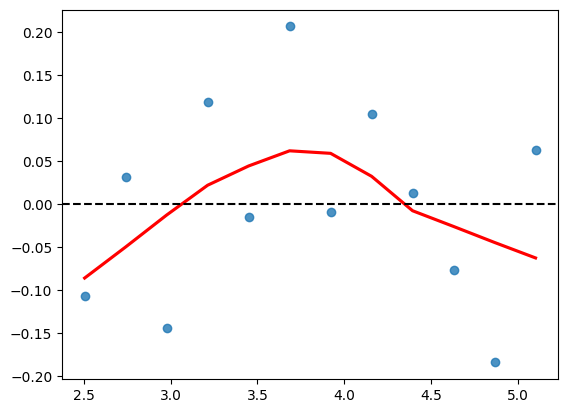

In [143]:
sns.regplot(x = modelo1.fittedvalues, y = modelo1.resid, lowess = True, line_kws = dict(color = 'red'))
plt.axhline(y = 0, color = 'black', linestyle = '--')


NORMAL Q-Q PLOT


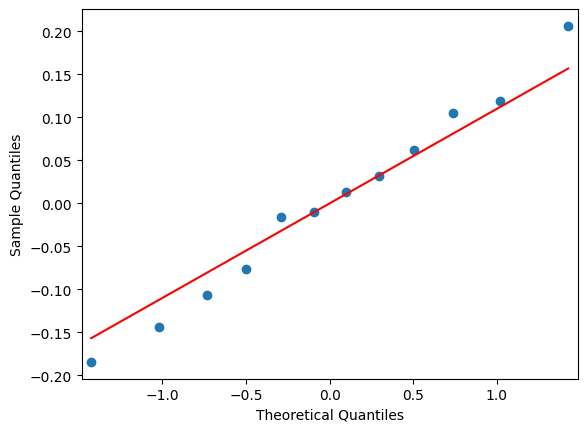

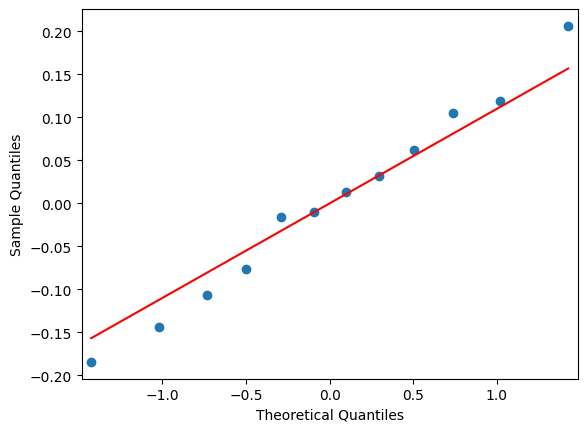

In [144]:
sm.qqplot(modelo1.resid, line = 's')